<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula1a_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=0):
  X = np.random.uniform(size=(n,2))
  AUX = np.multiply(X, slop)-[0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

slop=[-1,2]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.65220928, 0.09604231],
        [0.90196509, 0.70823804],
        [0.96485074, 0.60754456],
        [0.49508881, 0.18224522],
        [0.29348543, 0.9011247 ],
        [0.6711851 , 0.47550063],
        [0.39730861, 0.1322555 ],
        [0.5054014 , 0.05077461],
        [0.78755427, 0.34909666],
        [0.39597228, 0.10221531],
        [0.67156599, 0.9316667 ],
        [0.75508684, 0.9372756 ],
        [0.559571  , 0.47572236],
        [0.77402866, 0.92609769],
        [0.54742494, 0.05171961],
        [0.76379129, 0.86279567],
        [0.9470242 , 0.35444028],
        [0.22750965, 0.84932666],
        [0.93424694, 0.5792277 ],
        [0.58140544, 0.59620158]]),
 array([ 1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        -1, -1, -1]))

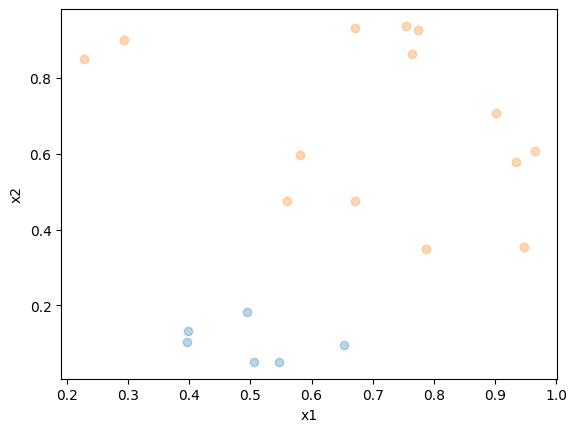

In [82]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.xlabel('x1')
  plt.ylabel('x2')
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], 'o', alpha=0.3)

plotDataset(X, y)

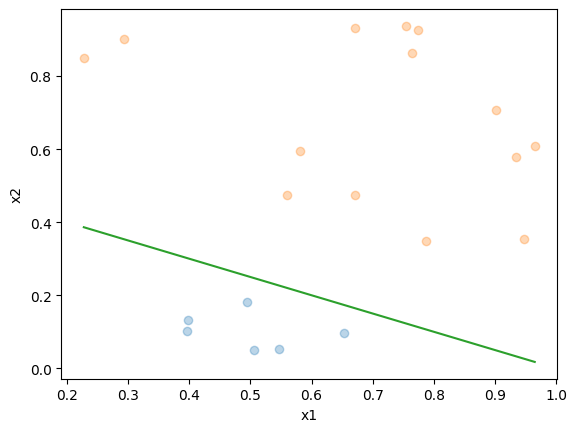

In [83]:
def plotHiperplano(X, y, vetor, intercept=0):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X, y, vetor_hiperplano, intercept)

In [86]:
def sign(a):
  return (a >= 0) * 2 -1

1.0
[  7.26083653  -2.61666916 -15.30212765]


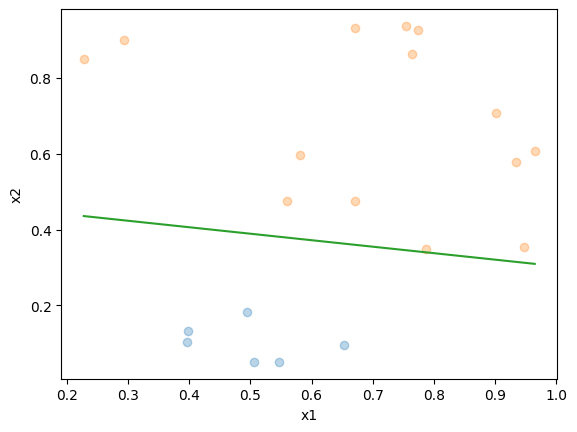

In [90]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.w = None
    self.activation = sign
    self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.9
[ 0.15667928 -0.0307871  -0.76059317]


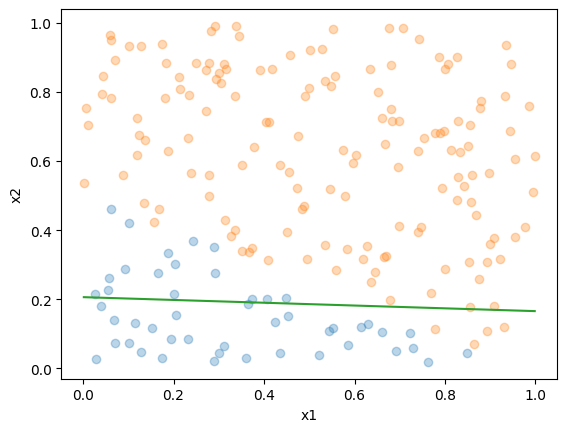

In [88]:
Xte, yte = criaDataset(200, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])